In [3]:
from datasets import load_from_disk

grouped_dataset = load_from_disk("/Users/ritubansal/personal_projects/social_media_analysis/venv/dataset/grouped_data")

In [4]:
print(len(grouped_dataset))

2199379


In [5]:
print(grouped_dataset.column_names)

['day_block', 'day', 'platform', 'main_emotion', 'primary_theme', 'secondary_theme_1', 'secondary_theme_2', 'secondary_theme_3', 'count', 'avg_sentiment']


In [6]:
import random
print(grouped_dataset[random.randint(0, len(grouped_dataset) - 1)])

{'day_block': 'Early-Morning', 'day': 'Wed', 'platform': 'www.thesunchronicle.com', 'main_emotion': 'neutral', 'primary_theme': 'Technology', 'secondary_theme_1': 'Investing', 'secondary_theme_2': 'Politics', 'secondary_theme_3': None, 'count': 11, 'avg_sentiment': -0.03636363636363638}


In [7]:
# Convert to pandas DataFrame
df = grouped_dataset.to_pandas()
df.head(5)

,day_block,day,platform,main_emotion,primary_theme,secondary_theme_1,secondary_theme_2,secondary_theme_3,count,avg_sentiment
0,Late-Night,Thu,x.com,neutral,Business,Economy,Investing,Politics,28247,0.006270
1,Late-Night,Thu,x.com,excitement,Technology,Entertainment,Politics,None,220,0.572227
2,Late-Night,Thu,x.com,neutral,Investing,Investing,None,None,6726,0.135856
3,Late-Night,Thu,bsky.app,neutral,Entertainment,Investing,Environment,Politics,42561,0.042746
4,Late-Night,Thu,x.com,approval,Finance,Investing,Sports,Politics,1329,0.185132


## Basic EDA

/var/folders/gq/j5b6t8b94b35z8cyq_vl2ld80000gn/T/ipykernel_71533/2074035791.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(["day", "day_block"])["count"].sum().unstack()


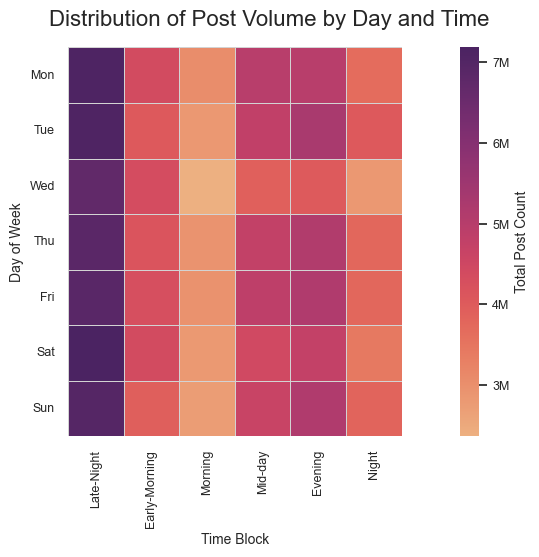

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter
import os

plt.rcParams["font.family"] = "IBM Plex Sans"

day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
block_order = ["Late-Night", "Early-Morning", "Morning", "Mid-day", "Evening", "Night"]

df["day"] = pd.Categorical(df["day"], categories=day_order, ordered=True)
df["day_block"] = pd.Categorical(df["day_block"], categories=block_order, ordered=True)

heatmap_data = df.groupby(["day", "day_block"])["count"].sum().unstack()

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid", font_scale=1.1)

custom_cmap = sns.color_palette("flare", as_cmap=True)

ax = sns.heatmap(
heatmap_data,
cmap=custom_cmap,
cbar_kws={"label": "Total Post Count"},
linewidths=0.5,
linecolor="lightgray",
square=True
)

def short_number_formatter(x, _):
    if x >= 1_000_000_000:
        return f"{x/1_000_000_000:.0f}B"
    elif x >= 1_000_000:
        return f"{x/1_000_000:.0f}M"
    elif x >= 1_000:
        return f"{x/1_000:.0f}K"
    else:
        return f"{int(x)}"

colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_major_formatter(FuncFormatter(short_number_formatter))
colorbar.ax.tick_params(labelsize=9)
colorbar.ax.set_ylabel("Total Post Count", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.suptitle(
"Distribution of Post Volume by Day and Time",
fontsize=16,
x=0.68,  # center horizontally
y=0.98  # slightly below the top edge
)

plt.xlabel("Time Block", fontsize=10)
plt.ylabel("Day of Week", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9, rotation=0)

os.makedirs("visualizations", exist_ok=True)

plt.savefig(
"visualizations/day_time_volume_heatmap.png",     # filename
dpi=300,                     # high resolution
bbox_inches="tight",        # trims extra whitespace
transparent=False           # set True if saving over light/dark backgrounds
)

plt.show()

/var/folders/gq/j5b6t8b94b35z8cyq_vl2ld80000gn/T/ipykernel_71533/1879041877.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


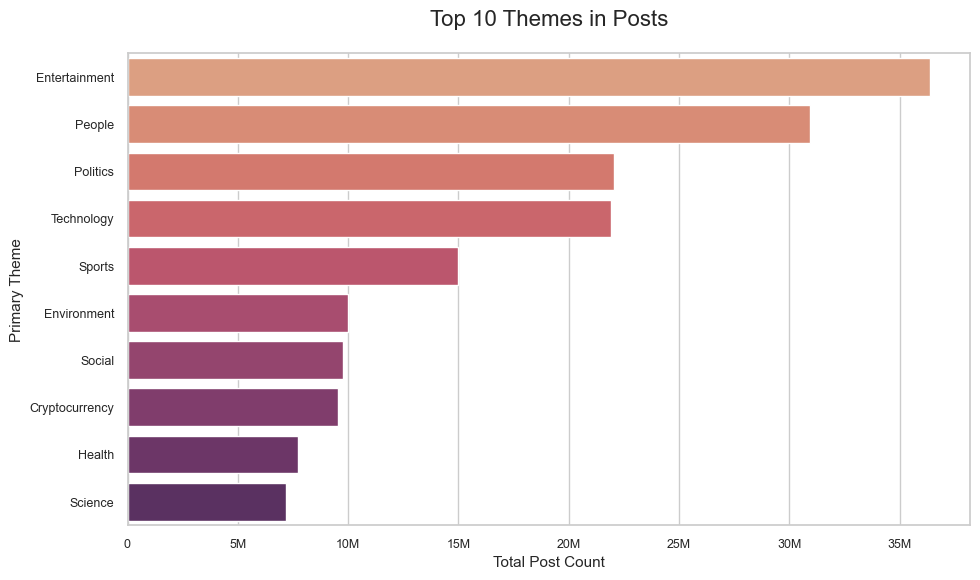

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Set font and style
plt.rcParams["font.family"] = "IBM Plex Sans"
sns.set_theme(style="whitegrid", font_scale=1.1)

# Group by primary_theme
theme_counts = (
    df.groupby("primary_theme")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=theme_counts,
    x="count",
    y= "primary_theme",
    palette="flare"
)

# Formatter for axis labels
def short_number_formatter(x, _):
    if x >= 1_000_000_000:
        return f"{x/1_000_000_000:.0f}B"
    elif x >= 1_000_000:
        return f"{x/1_000_000:.0f}M"
    elif x >= 1_000:
        return f"{x/1_000:.0f}K"
    else:
        return f"{int(x)}"

ax.xaxis.set_major_formatter(FuncFormatter(short_number_formatter))

# Labels and title
plt.xlabel("Total Post Count", fontsize=11)
plt.ylabel("Primary Theme", fontsize=11)
plt.title("Top 10 Themes in Posts", fontsize=16, pad=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()

plt.savefig(
"visualizations/top_themes.png",     # filename
dpi=300,                     # high resolution
bbox_inches="tight",        # trims extra whitespace
transparent=False           # set True if saving over light/dark backgrounds
)

plt.show()

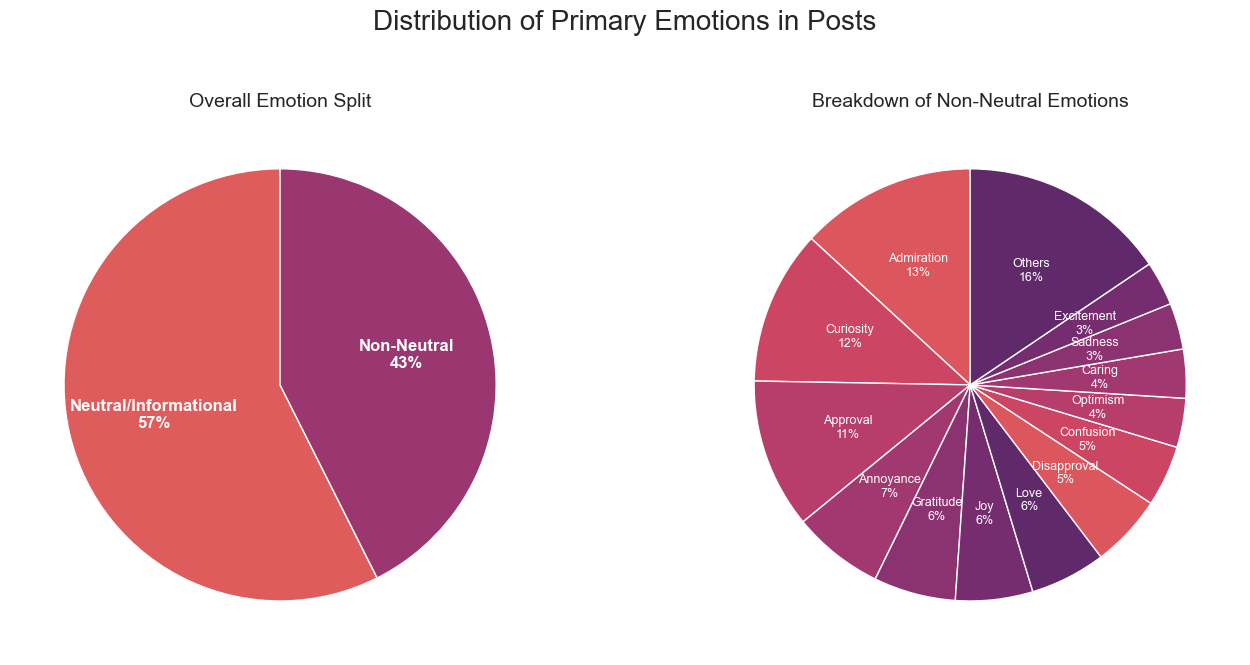

In [10]:
def make_autopct(labels):
    def my_autopct(pct):
        return f"{labels[my_autopct.idx]}\n{int(round(pct))}%"
    my_autopct.idx = 0
    def wrapper(pct):
        result = my_autopct(pct)
        my_autopct.idx += 1
        return result
    return wrapper

# Step 1: Prepare emotion counts
emotion_counts = (
    df.groupby("main_emotion")["count"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Split into neutral vs others
neutral_count = emotion_counts.loc[emotion_counts["main_emotion"] == "neutral", "count"].values[0]
other_counts_df = emotion_counts[emotion_counts["main_emotion"] != "neutral"]
other_total = other_counts_df["count"].sum()

# Data for first pie chart
outer_labels = ["Neutral/Informational", "Non-Neutral"]
outer_sizes = [neutral_count, other_total]
outer_colors = sns.color_palette("flare", n_colors=2)

# Data for second pie chart
top13 = other_counts_df.head(13)
other_combined = other_counts_df.iloc[13:]["count"].sum()
inner_labels = top13["main_emotion"].tolist() + ["Others"]
inner_labels= [label.capitalize() for label in inner_labels]
inner_sizes = top13["count"].tolist() + [other_combined]

full_flare = sns.color_palette("flare", 10)

# Pick colors from flare that are darker/mid-to-deep tones
custom_flare_for_white_text = full_flare[3:10]

#inner_colors = sns.color_palette("flare", n_colors=14)
#inner_colors = sns.color_palette("pastel", len(inner_labels))

# Step 2: Plot both charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# First pie chart: Neutral vs Other Emotions
wedges1, texts1, autotexts1 = ax1.pie(
    outer_sizes,
    autopct=make_autopct(outer_labels),
    startangle=90,
    colors=outer_colors,
    textprops={'fontsize': 12, 'color': 'white', 'weight': 'bold'}
)
ax1.set_title("Overall Emotion Split", fontsize=14)

# Second pie chart: Top emotions within 'Other Emotions'
wedges2, texts2, autotexts2 = ax2.pie(
    inner_sizes,
    autopct=make_autopct(inner_labels),
    startangle=90,
    colors=custom_flare_for_white_text[:len(inner_sizes)],
    textprops={'fontsize': 9, 'color': 'white'}
)
ax2.set_title("Breakdown of Non-Neutral Emotions", fontsize=14)

plt.suptitle("Distribution of Primary Emotions in Posts", fontsize=20, y=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

plt.savefig(
"visualizations/emotions_breakdown.png",     # filename
dpi=300,                     # high resolution
bbox_inches="tight",        # trims extra whitespace
transparent=False           # set True if saving over light/dark backgrounds
)

plt.show()

In [11]:
# Remove prefix "www."
df["platform"] = df["platform"].str.replace(r"^www\.", "", regex=True)

# Remove trailing '.com'
df["platform"] = df["platform"].str.replace(r"\.com$", "", regex=True)

# Capitalize first letter
df["platform"] = df["platform"].str.capitalize()

# Calculate total counts by platform
platform_counts = df.groupby("platform")["count"].sum().sort_values(ascending=False)

# Get top 9 platforms
top9_platforms = platform_counts.head(9).index.tolist()

# Group others
df["platform_grouped"] = df["platform"].apply(lambda x: x if x in top9_platforms else "Others")

# Aggregate counts by new grouped platform
grouped_counts = (
    df.groupby("platform_grouped")["count"].sum()
    .reset_index()
    .sort_values(by="count", ascending=False)
)

grouped_counts

,platform_grouped,count
8,X,113197779
6,Reddit,49900350
1,Bsky.app,18627161
9,Youtube,5185148
5,Others,1980392
0,Boards.4channel.org,1034672
4,News.ycombinator,131426
2,Lemmy.world,53067
7,Threads.net,42196
3,Mastodon.social,38162


In [12]:
filtered_df = df[df['main_emotion'] != 'neutral'] # Removing netural posts. I'm working with aggregates so the trend disappears 
filtered_df.sort_values('count', ascending = False).head(20)

,day_block,day,platform,main_emotion,primary_theme,secondary_theme_1,secondary_theme_2,secondary_theme_3,count,avg_sentiment,platform_grouped
150579,Late-Night,Wed,X,admiration,Entertainment,Investing,Environment,Politics,34541,0.531016,X
784397,Late-Night,Sat,X,admiration,Entertainment,Investing,Environment,Politics,33503,0.521419,X
944362,Late-Night,Sun,X,admiration,Entertainment,Investing,Environment,Politics,32858,0.526155,X
135552,Late-Night,Tue,X,admiration,Entertainment,Investing,Environment,Politics,32814,0.527079,X
1104634,Late-Night,Mon,X,admiration,Entertainment,Investing,Environment,Politics,32389,0.530436,X
658601,Late-Night,Fri,X,admiration,Entertainment,Investing,Environment,Politics,30044,0.525356,X
188284,Early-Morning,Wed,X,admiration,Entertainment,Investing,Environment,Politics,29204,0.551293,X
1199,Late-Night,Thu,X,admiration,Entertainment,Investing,Environment,Politics,28215,0.523766,X
812781,Early-Morning,Sat,X,admiration,Entertainment,Investing,Environment,Politics,26395,0.534378,X
1134414,Early-Morning,Mon,X,admiration,Entertainment,Investing,Environment,Politics,25620,0.548398,X


In [13]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1352138 entries, 1 to 2199375
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   day_block          1352138 non-null  category
 1   day                1352138 non-null  category
 2   platform           1352138 non-null  object  
 3   main_emotion       1352138 non-null  object  
 4   primary_theme      1352138 non-null  object  
 5   secondary_theme_1  1349920 non-null  object  
 6   secondary_theme_2  1219210 non-null  object  
 7   secondary_theme_3  816123 non-null   object  
 8   count              1352138 non-null  int64   
 9   avg_sentiment      1352138 non-null  float64 
 10  platform_grouped   1352138 non-null  object  
dtypes: category(2), float64(1), int64(1), object(7)
memory usage: 105.7+ MB


In [14]:
filtered_df['avg_sentiment'].describe()

count    1.352138e+06
mean     2.459936e-02
std      4.521862e-01
min     -9.800000e-01
25%     -3.600000e-01
50%     -3.976626e-03
75%      4.000000e-01
max      9.900000e-01
Name: avg_sentiment, dtype: float64

## Does Sentiment for Themes vary throughout the day?

/var/folders/gq/j5b6t8b94b35z8cyq_vl2ld80000gn/T/ipykernel_71533/4265724102.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df_top.groupby('primary_theme', group_keys=False).apply(theme_agg).reset_index()


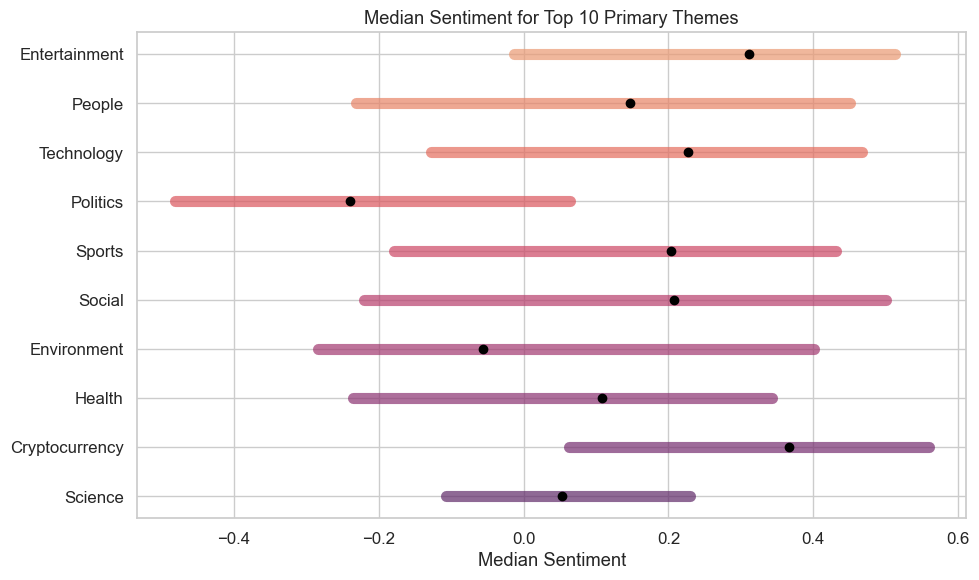

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Weighted quantile function ---
def weighted_quantile(values, weights, quantile):
    values, weights = np.array(values), np.array(weights)
    sorter = np.argsort(values)
    values, weights = values[sorter], weights[sorter]
    cum_weights = np.cumsum(weights)
    normalized_weights = cum_weights / cum_weights[-1]
    return np.interp(quantile, normalized_weights, values)

# --- Aggregate for top 10 themes ---
top_themes = filtered_df.groupby('primary_theme')['count'].sum().nlargest(10).index
df_top = filtered_df[filtered_df['primary_theme'].isin(top_themes)]

# --- Apply weighted quantile aggregation ---
def theme_agg(group):
    v = group['avg_sentiment']
    w = group['count']
    return pd.Series({
        'q25': weighted_quantile(v, w, 0.25),
        'q50': weighted_quantile(v, w, 0.5),  # renamed from 'median'
        'q75': weighted_quantile(v, w, 0.75),
        'total_count': w.sum()
    })

df_agg = df_top.groupby('primary_theme', group_keys=False).apply(theme_agg).reset_index()

# --- Sort themes by volume ---
df_agg = df_agg.sort_values('total_count', ascending=False).reset_index(drop=True)

# --- Plot ---
plt.figure(figsize=(10, 6))
palette = sns.color_palette("flare", n_colors=len(df_agg))

for i, (idx, row) in enumerate(df_agg.iterrows()):
    # IQR line
    plt.plot([row.q25, row.q75], [i, i], color=palette[i], linewidth=8, alpha=0.7)
    # Median point
    plt.plot(row.q50, i, 'o', color='black')

# Format axis
plt.yticks(range(len(df_agg)), df_agg['primary_theme'])
plt.gca().invert_yaxis()  # Largest at top
plt.xlabel("Median Sentiment")
plt.title("Median Sentiment for Top 10 Primary Themes")
plt.tight_layout()

plt.savefig(
"visualizations/median_sentiment_by_theme.png",     # filename
dpi=300,                     # high resolution
bbox_inches="tight",        # trims extra whitespace
transparent=False           # set True if saving over light/dark backgrounds
)

plt.show()

/var/folders/gq/j5b6t8b94b35z8cyq_vl2ld80000gn/T/ipykernel_71533/79731218.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day_agg = filtered_df.groupby('day_block', group_keys=False).apply(day_block_agg).reset_index()
/var/folders/gq/j5b6t8b94b35z8cyq_vl2ld80000gn/T/ipykernel_71533/79731218.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_day_agg = filtered_df.groupby('day_block', group_keys=False).apply(day_block_agg).reset_index()


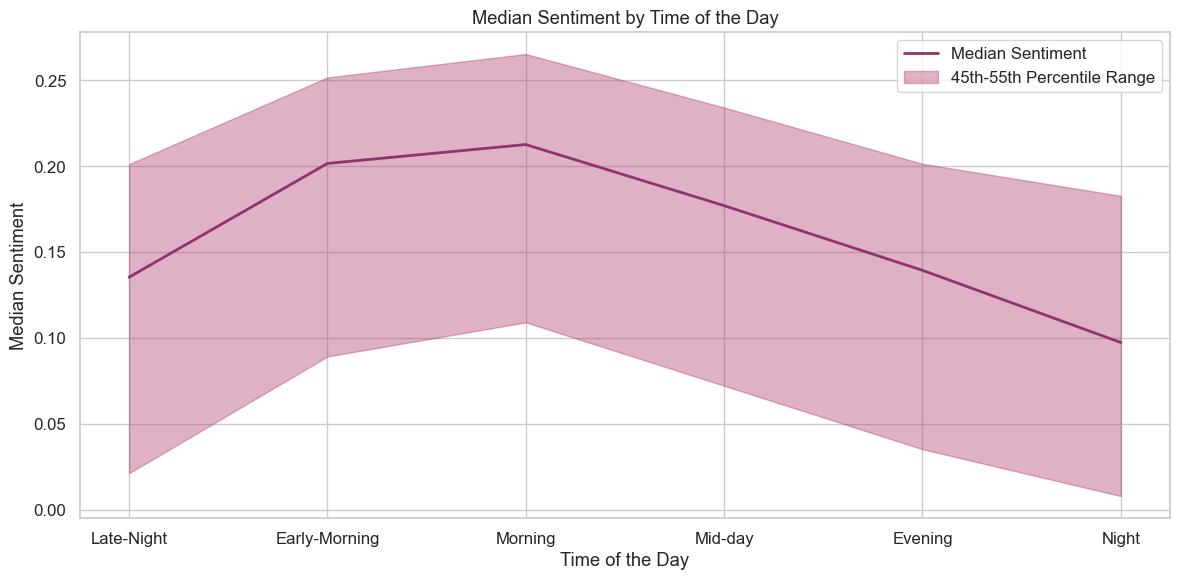

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Weighted quantile function ---
def weighted_quantile(values, weights, quantile):
    values, weights = np.array(values), np.array(weights)
    sorter = np.argsort(values)
    values, weights = values[sorter], weights[sorter]
    cum_weights = np.cumsum(weights)
    normalized_weights = cum_weights / cum_weights[-1]
    return np.interp(quantile, normalized_weights, values)

# --- Apply weighted quantile aggregation by day_block ---
def day_block_agg(group):
    v = group['avg_sentiment']
    w = group['count']
    return pd.Series({
        'q45': weighted_quantile(v, w, 0.45),
        'q50': weighted_quantile(v, w, 0.50),
        'q55': weighted_quantile(v, w, 0.55),
        'total_count': w.sum()
    })

df_day_agg = filtered_df.groupby('day_block', group_keys=False).apply(day_block_agg).reset_index()

# --- Plot ---
sns.set_palette("flare")
plt.figure(figsize=(12, 6))

plt.plot(df_day_agg['day_block'], df_day_agg['q50'], label='Median Sentiment', color=sns.color_palette("flare")[4], linewidth=2)
plt.fill_between(df_day_agg['day_block'], df_day_agg['q45'], df_day_agg['q55'],
                 color=sns.color_palette("flare")[3], alpha=0.4, label='45th-55th Percentile Range')

plt.xlabel("Time of the Day")
plt.ylabel("Median Sentiment")
plt.title("Median Sentiment by Time of the Day")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig(
"visualizations/median_sentiment_by_time_of_day.png",     # filename
dpi=300,                     # high resolution
bbox_inches="tight",        # trims extra whitespace
transparent=False           # set True if saving over light/dark backgrounds
)

plt.show()

/var/folders/gq/j5b6t8b94b35z8cyq_vl2ld80000gn/T/ipykernel_48873/3683553209.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_top.groupby(['primary_theme', 'day_block'])
/var/folders/gq/j5b6t8b94b35z8cyq_vl2ld80000gn/T/ipykernel_48873/3683553209.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(theme_day_agg)


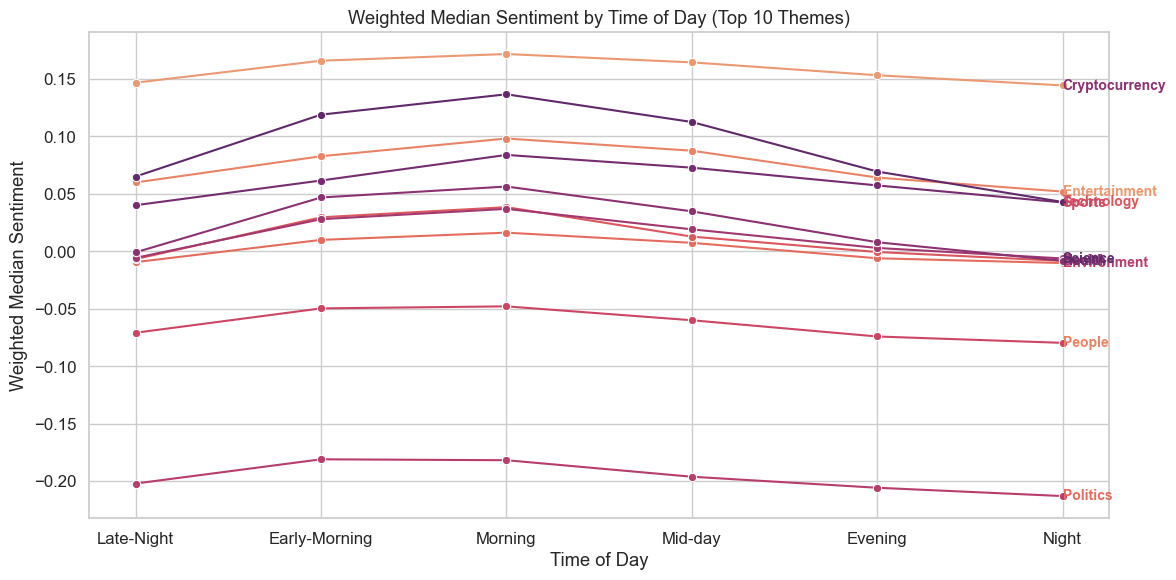

In [20]:
# --- Step 1: Weighted median function ---
def weighted_median(values, weights):
    sorted_idx = np.argsort(values)
    values_sorted = np.array(values)[sorted_idx]
    weights_sorted = np.array(weights)[sorted_idx]
    cum_weights = np.cumsum(weights_sorted)
    cutoff = weights_sorted.sum() / 2.0
    return values_sorted[cum_weights >= cutoff][0]

# --- Step 2: Top 10 themes by count ---
top_themes = (
    df.groupby('primary_theme')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top = df[df['primary_theme'].isin(top_themes)]

# --- Step 3: Grouped weighted median sentiment ---
def theme_day_agg(group):
    median = weighted_median(group['avg_sentiment'], group['count'])
    return pd.Series({'weighted_median_sentiment': median, 'total_count': group['count'].sum()})

df_agg = (
    df_top.groupby(['primary_theme', 'day_block'])
    .apply(theme_day_agg)
    .reset_index()
)

# Optional: Set day_time order if it's not already ordered
# Example order: ['morning', 'afternoon', 'evening', 'night']
# df_agg['day_time'] = pd.Categorical(df_agg['day_time'], categories=your_order_list, ordered=True)

# --- Step 4: Plot with labels at the end of each line ---
plt.figure(figsize=(12, 6))
palette = sns.color_palette("flare", n_colors=len(top_themes))

# Lineplot
sns.lineplot(
    data=df_agg,
    x='day_block',
    y='weighted_median_sentiment',
    hue='primary_theme',
    palette=palette,
    marker='o',
    legend=False  # We'll add custom labels
)

# Add text labels at the end of each line
for i, theme in enumerate(top_themes):
    subset = df_agg[df_agg['primary_theme'] == theme]
    last_point = subset.sort_values('day_block').iloc[-1]
    plt.text(
        x=last_point['day_block'],
        y=last_point['weighted_median_sentiment'],
        s=theme,
        color=palette[i],
        fontsize=10,
        va='center',
        ha='left',
        fontweight='bold'
    )

plt.title('Weighted Median Sentiment by Time of Day (Top 10 Themes)')
plt.ylabel('Weighted Median Sentiment')
plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()

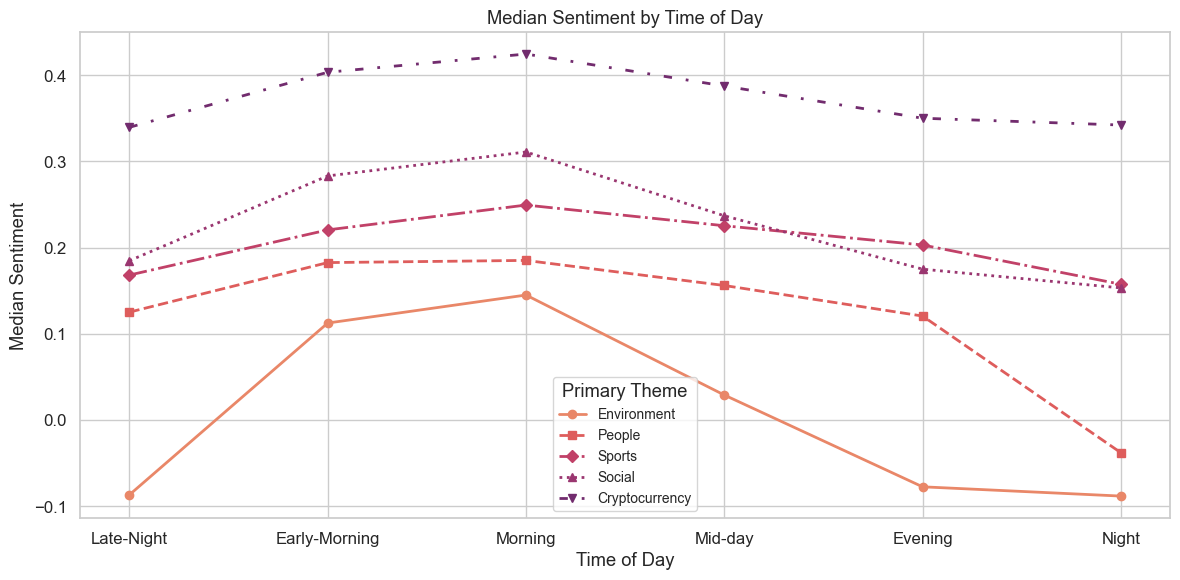

In [23]:
# --- Weighted median function ---
def weighted_median(values, weights):
    sorted_idx = np.argsort(values)
    values_sorted = np.array(values)[sorted_idx]
    weights_sorted = np.array(weights)[sorted_idx]
    cum_weights = np.cumsum(weights_sorted)
    cutoff = weights_sorted.sum() / 2.0
    return values_sorted[cum_weights >= cutoff][0]

# --- Selected themes ---
selected_themes = ['Environment', 'People', 'Sports', 'Social', 'Cryptocurrency']

# Filter dataframe for selected themes
df_top = filtered_df[filtered_df['primary_theme'].isin(selected_themes)].copy()
df_top['day_block'] = pd.Categorical(df_top['day_block'], ordered=True)

day_block_order = ["Late-Night", "Early-Morning", "Morning", "Mid-day", "Evening", "Night"]
def weighted_median_agg(group):
    return weighted_median(group['avg_sentiment'], group['count'])

df_agg = (
    df_top.groupby(['primary_theme', 'day_block'], observed=True)
    .agg(
        weighted_median_sentiment = ('avg_sentiment', lambda x: weighted_median(x, df_top.loc[x.index, 'count'])),
        total_count = ('count', 'sum')
    )
    .reset_index()
)

# Add numeric code for plotting x-axis
df_agg['day_block_num'] = df_agg['day_block'].cat.codes

# --- Plot setup ---

plt.figure(figsize=(12, 6))

# Use flare palette
palette = sns.color_palette("flare", n_colors=len(selected_themes))

# Define different line styles and markers for each theme
line_styles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5))]
markers = ['o', 's', 'D', '^', 'v']

# Plot each theme separately for full control on style
for i, theme in enumerate(selected_themes):
    subset = df_agg[df_agg['primary_theme'] == theme]
    plt.plot(
        subset['day_block_num'],
        subset['weighted_median_sentiment'],
        label=theme,
        color=palette[i],
        linestyle=line_styles[i % len(line_styles)],
        marker=markers[i % len(markers)],
        linewidth=2,
        markersize=6
    )

# Set x-axis labels and ticks
plt.xticks(ticks=range(len(day_block_order)), labels=day_block_order)
plt.xlabel('Time of Day')
plt.ylabel('Median Sentiment')
plt.title('Median Sentiment by Time of Day')

plt.legend(title='Primary Theme', loc='best', fontsize=10)
plt.tight_layout()

plt.savefig(
"visualizations/fluctuations_in_median_sentiment.png",     # filename
dpi=300,                     # high resolution
bbox_inches="tight",        # trims extra whitespace
transparent=False           # set True if saving over light/dark backgrounds
)

plt.show()

## Breakdown of Themes by Emotions

In [24]:
import pandas as pd

# Step 1: Find top 10 primary themes by total count
top_10_themes = (
    filtered_df.groupby('primary_theme')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Step 2: Filter the dataframe to only include these top 10 themes
df_top_themes = filtered_df[filtered_df['primary_theme'].isin(top_10_themes)]

# Step 3: Group by primary_theme and main_emotion, sum counts
emotion_counts = (
    df_top_themes.groupby(['primary_theme', 'main_emotion'])['count']
    .sum()
    .reset_index()
)

# Step 4: For each primary_theme, get top 5 emotions by count
top5_emotions_per_theme = (
    emotion_counts
    .sort_values(['primary_theme', 'count'], ascending=[False, False])
    .groupby('primary_theme')
    .head(5)
    .reset_index(drop=True)
)

# Display the result
print(top5_emotions_per_theme)

     primary_theme    main_emotion    count
0       Technology       curiosity  1241328
1       Technology        approval   998891
2       Technology      admiration   944990
3       Technology       gratitude   627323
4       Technology       confusion   539594
5           Sports      admiration  1023304
6           Sports       curiosity   674951
7           Sports        approval   577605
8           Sports       annoyance   500014
9           Sports  disappointment   424961
10          Social       curiosity   513905
11          Social        approval   465544
12          Social       gratitude   432760
13          Social      admiration   423330
14          Social       annoyance   390737
15         Science        approval   689663
16         Science       curiosity   441381
17         Science      admiration   232370
18         Science       confusion   182977
19         Science     disapproval   131510
20        Politics       curiosity  1162542
21        Politics        approv

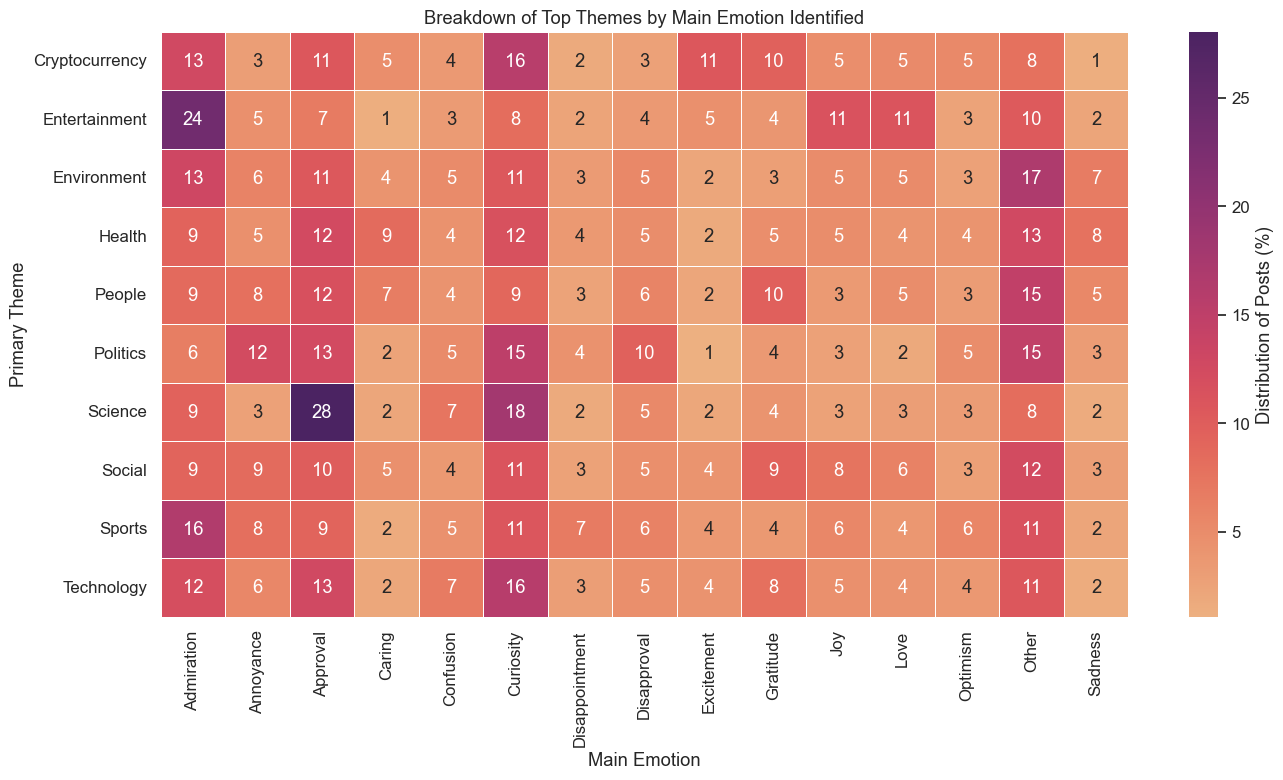

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Identify top 10 primary themes by total count
top_10_themes = (
    filtered_df.groupby('primary_theme')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Step 2: Filter df for only those themes
df_top_themes = filtered_df[filtered_df['primary_theme'].isin(top_10_themes)]

# Step 3: Aggregate counts by primary_theme and main_emotion
agg_counts = (
    df_top_themes.groupby(['primary_theme', 'main_emotion'])['count']
    .sum()
    .reset_index()
)

# Step 4: Calculate total counts per primary_theme
theme_totals = agg_counts.groupby('primary_theme')['count'].sum().reset_index()
theme_totals.rename(columns={'count': 'total_count'}, inplace=True)

# Step 5: Merge totals back and compute percentages
agg_counts = agg_counts.merge(theme_totals, on='primary_theme')
agg_counts['percentage'] = (agg_counts['count'] / agg_counts['total_count']) * 100

# Step 6: Find emotions where at least one theme has > 5%
emotions_to_keep = agg_counts.groupby('main_emotion')['percentage'].max()
emotions_to_keep = emotions_to_keep[emotions_to_keep > 5].index.tolist()

# Step 7: Group low volume emotions as 'Other'
agg_counts['main_emotion_grouped'] = agg_counts['main_emotion'].where(
    agg_counts['main_emotion'].isin(emotions_to_keep), 'Other'
)

# Step 8: Re-aggregate with grouped emotions
agg_counts_grouped = (
    agg_counts.groupby(['primary_theme', 'main_emotion_grouped'])['count']
    .sum()
    .reset_index()
)

# Step 9: Recalculate totals and percentages after grouping
theme_totals_grouped = agg_counts_grouped.groupby('primary_theme')['count'].sum().reset_index()
theme_totals_grouped.rename(columns={'count': 'total_count'}, inplace=True)
agg_counts_grouped = agg_counts_grouped.merge(theme_totals_grouped, on='primary_theme')
agg_counts_grouped['percentage'] = (agg_counts_grouped['count'] / agg_counts_grouped['total_count']) * 100

# Step 10: Capitalize first letter of emotions
agg_counts_grouped['main_emotion_grouped'] = agg_counts_grouped['main_emotion_grouped'].str.capitalize()

# Step 11: Pivot data for heatmap
heatmap_data = agg_counts_grouped.pivot(
    index='primary_theme', 
    columns='main_emotion_grouped', 
    values='percentage'
).fillna(0)

# Step 12: Plot heatmap without decimal points in annotations
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap='flare',
    annot=True,
    fmt='.0f',
    linewidths=0.5,
    cbar_kws={'label': 'Distribution of Posts (%)'}
)

plt.title('Breakdown of Top Themes by Main Emotion Identified')
plt.ylabel('Primary Theme')
plt.xlabel('Main Emotion')
plt.tight_layout()

plt.savefig(
"visualizations/breakdown_of_themes_by_emotions.png",     # filename
dpi=300,                     # high resolution
bbox_inches="tight",        # trims extra whitespace
transparent=False           # set True if saving over light/dark backgrounds
)

plt.show()

## Which Themes appear together

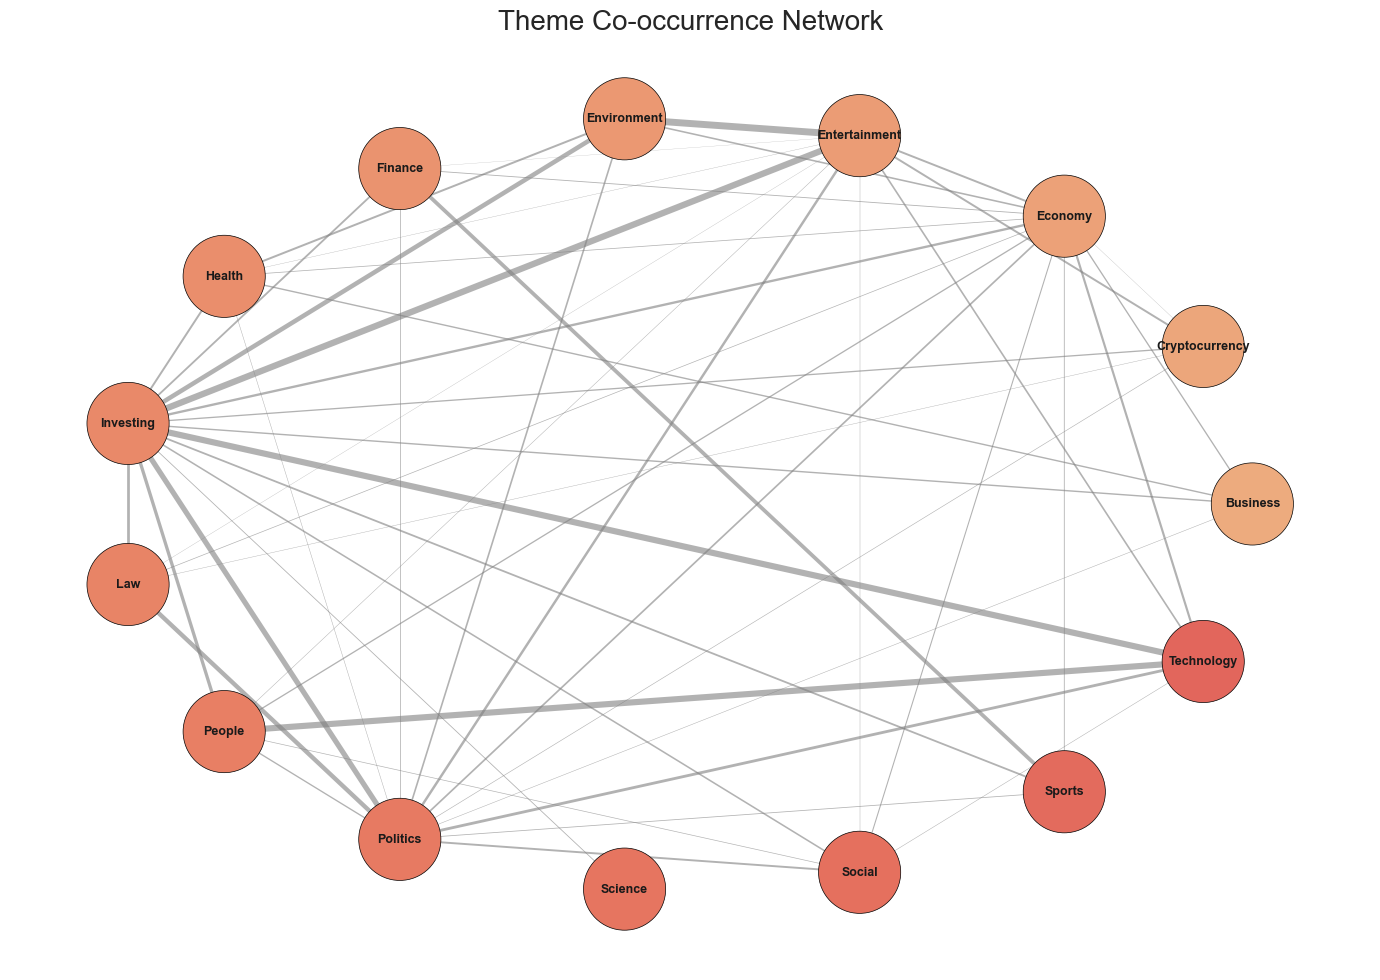

In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from matplotlib.colors import to_hex

# -- Step 1: Filter out blank themes --
df_filtered = df[~df['primary_theme'].isna() & ~df['secondary_theme_1'].isna() & ~df['secondary_theme_2'].isna()]
df_filtered = df_filtered[
    (df_filtered['primary_theme'].str.strip() != '') &
    (df_filtered['secondary_theme_1'].str.strip() != '') &
    (df_filtered['secondary_theme_2'].str.strip() != '')
]

# -- Step 2: Count co-occurrences between themes --
pair_counter = Counter()
for _, row in df_filtered.iterrows():
    themes = set([row['primary_theme'], row['secondary_theme_1'], row['secondary_theme_2']])
    themes.discard('')
    if len(themes) > 1:
        for pair in combinations(sorted(themes), 2):
            pair_counter[pair] += row['count']

# -- Step 3: Theme frequency for primary_theme node sizing --
theme_primary_counts = df_filtered.groupby('primary_theme')['count'].sum()

# -- Step 4: Build the graph --
G = nx.Graph()

# Add nodes
for theme, total in theme_primary_counts.items():
    G.add_node(theme, size=total)

# Add edges with weights
for (t1, t2), weight in pair_counter.items():
    if t1 in G.nodes and t2 in G.nodes:
        G.add_edge(t1, t2, weight=weight)

# -- Step 5: Threshold for edge filtering --
edge_weights = [d['weight'] for _, _, d in G.edges(data=True)]
cutoff = pd.Series(edge_weights).quantile(0.5)  # 50% threshold
strong_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= cutoff]

# -- Step 6: Positioning --
pos = nx.circular_layout(G)

# -- Step 7: Node sizing (scale to allow label to fit) --
# We'll use text length as a proxy for label space needed
node_labels = {node: node for node in G.nodes}
node_sizes = []
for node in G.nodes:
    base_size = G.nodes[node]['size']
    label_length = len(node)
    size_adjusted = (base_size / max(theme_primary_counts)) * 3000 + label_length * 100
    node_sizes.append(size_adjusted)

# -- Step 8: Flare color theme --
node_list = list(G.nodes)
lighter_flare_colors = sns.color_palette("flare", 50)[:len(node_list)]
node_color_map = dict(zip(node_list, lighter_flare_colors))

node_colors = [to_hex(node_color_map[node]) for node in G.nodes]

# -- Step 9: Edge weights scaled for display --
edge_weights_scaled = [G[u][v]['weight'] / max(edge_weights) * 5 for u, v in strong_edges]

# -- Step 10: Plot --
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=3500, node_color=node_colors[:len(G.nodes)], edgecolors='black', linewidths=0.5)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=strong_edges, width=edge_weights_scaled, edge_color='gray', alpha=0.6)

plt.title("Theme Co-occurrence Network", fontsize=20)
plt.axis("off")
plt.tight_layout()

plt.savefig(
"visualizations/theme_cooccurence_network.png",     # filename
dpi=300,                     # high resolution
bbox_inches="tight",        # trims extra whitespace
transparent=False           # set True if saving over light/dark backgrounds
)

plt.show()

## Polarization by people in politics

In [1]:
import json 

with open('dataset/final_aggregated_mentions.json', 'r') as file:
    data = json.load(file)

print("JSON data loaded successfully:")
print(data)

JSON data loaded successfully:
[{'person': 'Donald Trump', 'count': 2293213, 'avg_sentiment': -0.20843802341954282, 'min_sentiment': -0.98, 'max_sentiment': 0.99, 'median_sentiment': -0.24, 'std_sentiment': 0.40007911789926687, 'percentile_10': -0.7, 'percentile_25': -0.54, 'percentile_75': 0.05, 'percentile_90': 0.37, 'sentiment_entropy': 0.8982365081805145}, {'person': 'Joe Biden', 'count': 863677, 'avg_sentiment': -0.24443552392850568, 'min_sentiment': -0.98, 'max_sentiment': 0.99, 'median_sentiment': -0.28, 'std_sentiment': 0.38757810212079996, 'percentile_10': -0.71, 'percentile_25': -0.56, 'percentile_75': 0.01, 'percentile_90': 0.3, 'sentiment_entropy': 0.8835653052480884}, {'person': 'Kamala Harris', 'count': 307776, 'avg_sentiment': -0.21090275070180908, 'min_sentiment': -0.98, 'max_sentiment': 0.98, 'median_sentiment': -0.24, 'std_sentiment': 0.3990507443623967, 'percentile_10': -0.71, 'percentile_25': -0.54, 'percentile_75': 0.06, 'percentile_90': 0.36, 'sentiment_entropy': 

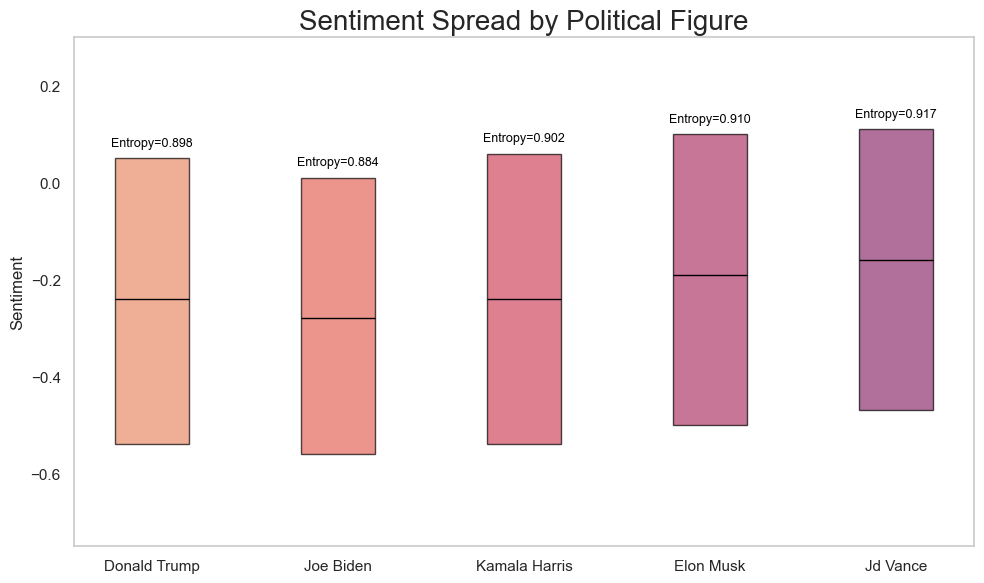

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

# Apply the flare theme
sns.set_theme(style="whitegrid", palette="flare")

# Convert to DataFrame
df = pd.DataFrame(data)

# Initialize figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Remove internal grid lines
ax1.grid(False)

# Plot IQR bars with median line and entropy label
for i, row in df.iterrows():
    # Draw IQR bar
    bar = ax1.bar(
        i,
        row['percentile_75'] - row['percentile_25'],
        bottom=row['percentile_25'],
        width=0.4,
        color=sns.color_palette("flare")[i],
        alpha=0.7,
        edgecolor='black'
    )
    
    # Draw median line inside bar
    ax1.hlines(
        row['median_sentiment'],
        i - 0.2,
        i + 0.2,
        colors='black',
        linewidth=1
    )

    # Position label just above the top of the box
    label_y = row['percentile_75'] + 0.02
    ax1.text(
        i,
        label_y,
        f"Entropy={row['sentiment_entropy']:.3f}",
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

# Axis setup
ax1.set_ylabel("Sentiment")
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df["person"])
ax1.set_ylim(-0.75, 0.3)  # adjust as needed to fit labels
# Titles and layout
plt.title("Sentiment Spread by Political Figure", fontsize=20)
fig.tight_layout()

plt.savefig(
"visualizations/sentiment_spread.png",     # filename
dpi=300,                     # high resolution
bbox_inches="tight",        # trims extra whitespace
transparent=False           # set True if saving over light/dark backgrounds
)


plt.show()